# 1420 Assignment 1; Mohammed, Nasser
Mon 9 Feb, 2026

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib as mpl
mpl.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})

### Question 1.

Key assumptions: 

Cross section of an individual star: 1.6 x 10^-15 pc^2

Cross section of a galaxy: 3.2 x 10^8 pc^2


In [2]:
def t_relaxation(N, t_dyn):
    """
    N: Number of particles
    t_dyn: dynamical time, in Gyr
    """
    return N/(8*np.log(N))*t_dyn*u.Gyr

def t_dynamical(r, v_c):
    """
    r: radius in kpc
    v_c: circular velocity in km/s
    """
    return 2*np.pi*r*u.kpc/(v_c*u.km/u.s)

In [3]:
import pandas as pd
# - had chatGPT write the table into a DF
df = pd.DataFrame({
    "Object Type": ["globular cluster", "dwarf galaxy", "Milky Way", "galaxy group", "galaxy cluster"],
    "Radius": [0.01, 0.1, 10, 1000, 5000],
    "Velocity": [5, 10, 200, 200, 1000],
    "N": [10**5, 10**7, 10**11, 50, 10**3],
    "Particle": ["star", "star", "star", "galaxy", "galaxy"],})
print(df)

        Object Type   Radius  Velocity             N Particle
0  globular cluster     0.01         5        100000     star
1      dwarf galaxy     0.10        10      10000000     star
2         Milky Way    10.00       200  100000000000     star
3      galaxy group  1000.00       200            50   galaxy
4    galaxy cluster  5000.00      1000          1000   galaxy


In [4]:
df = df.copy()
df["Dynamical Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    v_c = row["Velocity"]
    r = row['Radius']
    t_dyn = t_dynamical(r, v_c)
    print(f'The dynamical time for object "{row['Object Type']}" is \t {t_dyn.to(u.Gyr):.3}')
    df.loc[i,'Dynamical Time (Gyr)'] = t_dyn.value

The dynamical time for object "globular cluster" is 	 0.0123 Gyr
The dynamical time for object "dwarf galaxy" is 	 0.0614 Gyr
The dynamical time for object "Milky Way" is 	 0.307 Gyr
The dynamical time for object "galaxy group" is 	 30.7 Gyr
The dynamical time for object "galaxy cluster" is 	 30.7 Gyr


In [5]:
df = df.copy()
df["Relaxation Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    N = row["N"]
    t_dyn = row["Dynamical Time (Gyr)"]
    t_relax =t_relaxation(N, t_dyn)
    print(f'The relaxation time for object "{row['Object Type']}" is \t {t_relax.to(u.Gyr):.3}')
    df.loc[i,'Relaxation Time (Gyr)'] = t_relax.value

The relaxation time for object "globular cluster" is 	 13.6 Gyr
The relaxation time for object "dwarf galaxy" is 	 4.87e+03 Gyr
The relaxation time for object "Milky Way" is 	 1.55e+08 Gyr
The relaxation time for object "galaxy group" is 	 50.2 Gyr
The relaxation time for object "galaxy cluster" is 	 5.68e+02 Gyr


In [6]:
df = df.copy()
df["Collisional Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    if row['Particle'] == 'star':
        cross_section = 1.6e-15 * u.pc**2
    elif row['Particle'] == 'galaxy':
        cross_section = 3.2e8 *u.pc**2

    n = row['N'] / (4/3*np.pi*(row['Radius']*u.kpc)**3) #particle density
    mean_free_path = (n*cross_section)**-1
    t_collide = mean_free_path/(row['Velocity']*u.km/u.s)

    print(f'The direction collisional time for particles in object "{row['Object Type']}" is \t {t_collide.to(u.Gyr):.3}')
    df.loc[i,'Collisional Time (Gyr)'] = t_collide.to(u.Gyr).value
    


The direction collisional time for particles in object "globular cluster" is 	 5.12e+09 Gyr
The direction collisional time for particles in object "dwarf galaxy" is 	 2.56e+10 Gyr
The direction collisional time for particles in object "Milky Way" is 	 1.28e+11 Gyr
The direction collisional time for particles in object "galaxy group" is 	 1.28e+03 Gyr
The direction collisional time for particles in object "galaxy cluster" is 	 1.6e+03 Gyr


In [7]:
df

,Object Type,Radius,Velocity,N,Particle,Dynamical Time (Gyr),Relaxation Time (Gyr),Collisional Time (Gyr)
0,globular cluster,0.01,5,100000,star,0.012566,13.643764,5119708100.616016
1,dwarf galaxy,0.10,10,10000000,star,0.062832,4872.772692,25598540503.080078
2,Milky Way,10.00,200,100000000000,star,0.314159,155042767.482027,127992702515.400406
3,galaxy group,1000.00,200,50,galaxy,31.415927,50.191305,1279.927025
4,galaxy cluster,5000.00,1000,1000,galaxy,31.415927,568.490147,1599.908781


Above I've calculated the dynamical, direct collisional, and relaxation time for the provided stellar systems. The most simple divide to distinguish the dynamical state of each system is those who's relaxation time is less than the age of the universe, and those greater.

Based on the numbers provided, only the globular cluster system (GC) would reach equillibrium on order t_hubble, all other systems we cannot say are in dynamical equillibrium (not accounting for phase-mixing or violent relaxation).

### Question 2.

Because we're told the radial denisty profile is isothermal, we can understand that to mean the potential is a spherical power-law model with $\alpha = 2$.

#### 2a.

In [8]:
t_dynamical(8, 220).to(u.Myr)

<Quantity 223.40544439 Myr>

Above is the rotation period at the location of the Sun. Assuming the MW galaxy formed just after the Big Bang, we can calculate how many orbits have been completed:

In [9]:
sun_period = t_dynamical(8, 220).to(u.Myr)
print(f'{(13.8 * u.Gyr / sun_period.to(u.Gyr)):.2f} orbits completed')

61.77 orbits completed


#### 2b.

using $v_c^2 = \frac{GM(<r)}{r}$

In [10]:
M_enclosed = (220*u.km/u.s)**2*8*u.kpc/c.G
print(f'Mass enclosed at Sun\'s position: {M_enclosed.to(u.Msun):.2e}')

Mass enclosed at Sun's position: 9.00e+10 solMass


#### 2c.

We need to find the potential at $r_\odot$ and $r_\infty$.

We will use $v_\text{esc} = \sqrt{2[\Phi_\infty - \Phi_{r_\odot}]}$ from equation 3.13 of galaxiesbook.

Because we define the 'edge' of our mass distribution to be at $10 \ {r_\odot}$, the potential goes to 0 at r -> $\infty$. So, the escape velocity becomes $v_\text{esc} = \sqrt{-2\Phi_{r_\odot}}$.

To compute the potential at $r_\odot$, we'll leverage Newton's shell theorems, summing the contributions from al shells inside and outside of a radius r.

$$
\Phi(r) = -4\pi\,G\,\left[\frac{1}{r}\int_0^r\mathrm{d}r'\,\rho(r')\,r'^2+\int_r^\infty\mathrm{d}r'\,\rho(r')\,r'\right]\,.
$$

For the spherical power-law potential with $\alpha=2$, $\rho(r) = \rho_0 (r_0/r)^2$. Defining $r_0 = r_\odot = 8 \text{ kpc}$, we can solve for $\rho_0$ using the mass we calculated above (2a):

$$\rho_0 = \frac{M(<r_0)}{4\pi r_\odot^3} = \frac{9 \times 10^10 M_\odot}{4\pi (8 \text{kpc}^3)} = 1.4 \times 10^7 M_\odot/\text{kpc}^3.$$


Lets solve for the potential.

$$
\Phi(r) = -4\pi G\left[
\frac{1}{r}\underbrace{\int_0^r \mathrm{d}r'\,\rho(r')\,r'^2}_{\text{1}}
+
\underbrace{\int_r^\infty \mathrm{d}r'\,\rho(r')\,r'}_{\text{2}}
\right].
$$

1 -> $= r_0^2 \rho_0 r$

2 -> split the integral into two (before and after the mass distribution cutoff at $10 r_\odot$). That is, 

$\int_r^\infty \mathrm{d}r'\,\rho(r')\,r' = \int_r^{10 r_\odot} dr' \rho(r')r' + \int_{10 r_\odot}^{\infty} dr' \rho(r')r'.$

The second integral is clearly equal to 0, because there is no mass distribution after the cutoff. So,

$\int_r^\infty \mathrm{d}r'\,\rho(r')\,r' = \rho_0 r_0^2 \ln(10r_\odot/r)$.

Back to the full equation, we find

$$\Phi(r) = -4\pi G r_0^2 \rho_0[1+\ln(10r_\odot/r)].$$

Below, we will calculate $\Phi(r_\odot)$ and solve for the escape velocity in the solar neighborhood.

In [11]:
rho0 = 1.4e7 * u.M_sun/u.kpc**3
r0 = 8*u.kpc

Phi_rsun = (-4*np.pi*c.G*rho0*r0**2*(1+np.log(10))).to((u.km/u.s)**2)

v_esc_sun = np.sqrt(-2*Phi_rsun)

print(f'Local escape velocity at Sun\'s position: {v_esc_sun:.2f}')

Local escape velocity at Sun's position: 565.56 km / s


#### 2d.
$v_c^2 = \frac{GM(<r)}{r}$

In [12]:
M_enclosed_80 = (220*u.km/u.s)**2 * 80 *u.kpc / c.G #Calculate circular velocity using enclosed mass
v_c_dwarf = np.sqrt(c.G*M_enclosed_80/(100*u.kpc))

print(f'The orbital period for a dwarf satellite galaxy at 100 kpc is {t_dynamical(100, v_c_dwarf.value).to(u.Gyr):.3}')

The orbital period for a dwarf satellite galaxy at 100 kpc is 3.12 Gyr


In [13]:
dwarf_period = t_dynamical(100, v_c_dwarf.value).to(u.Myr)
print(f'{(13.8 * u.Gyr / dwarf_period.to(u.Gyr)):.2f} orbits completed')

4.42 orbits completed


#### 2e.

Because the satellite is outside of the mass cutoff, we do not need the second integral from the equation above.

$$
\Phi(r) = -4\pi\,G\,\left[\frac{1}{r}\int_0^r\mathrm{d}r'\,\rho(r')\,r'^2\right]\
$$

Because $\rho(r)$ is 0 beyond $10 r_\odot$, we can calculate the potential at in the neighborhood of the dwarf galaxy using Newton's first shell theorem

$$
\Phi_\text{shell} (r > R) = - \frac{GM_\text{shell}}{r}
$$

We can find the mass enclosed at 80 kpc using the fact that the circular velocity is constant within the mass distribution (220 km/s), so $M_\text{shell} = v_c^2 \cdot 80 \text{ kpc}/G$.

Lets do the rest below:

In [14]:
M_enclosed_80 = (220*u.km/u.s)**2 * 80 *u.kpc / c.G

Phi_rdwarf = (-c.G*M_enclosed_80/(100*u.kpc)).to((u.km/u.s)**2)

v_w_esc_dwarf = np.sqrt(-2*Phi_rdwarf)
print(f'Local escape velocity at 100 kpc: {v_w_esc_dwarf:.2f}')

Local escape velocity at 100 kpc: 278.28 km / s


### Question 3.

#### 3a.

In [15]:
def potential(r, b):
    return -b/r+(1-b)*r**2 # Using G=1

array_b = np.array([0, 0.25, 0.75, 1])

v_0 = np.array([0, 0.8])
x_0 = np.array([1, 0])

In [16]:
energies = {}
angular_momenta = {}

for b in array_b:
    E = 0.5*np.linalg.norm(v_0)**2 + potential(np.linalg.norm(x_0), b)
    L = x_0[0]*v_0[1] - x_0[1]*v_0[0]
    energies[float(b)] = E
    angular_momenta[float(b)] = L
    print(f'Energy: {E:.2f} \t Angular Momentum Lz: {L:.2f}')

Energy: 1.32 	 Angular Momentum Lz: 0.80
Energy: 0.82 	 Angular Momentum Lz: 0.80
Energy: -0.18 	 Angular Momentum Lz: 0.80
Energy: -0.68 	 Angular Momentum Lz: 0.80


#### 3b.

Text(0.5, 0, 'r')

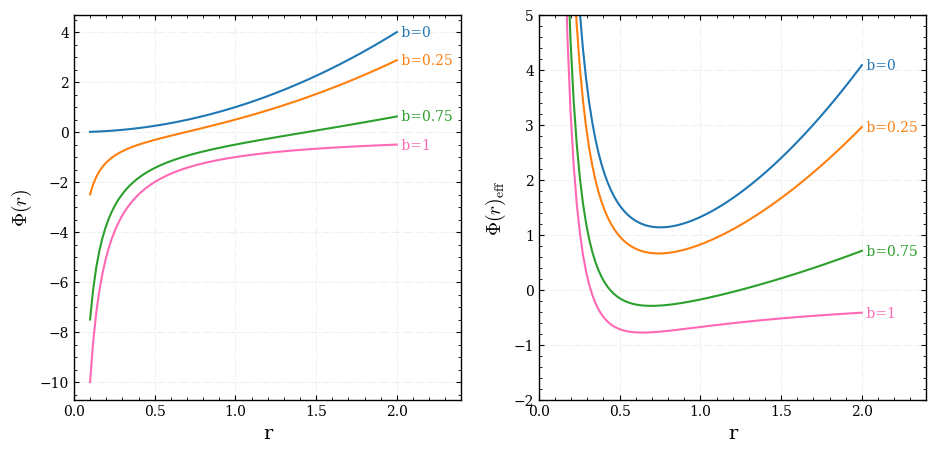

In [17]:
import matplotlib.pyplot as plt
fig, [ax, ax1] = plt.subplots(1, 2, figsize=(11, 5))

r_array = np.linspace(0.1, 2, 100)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'hotpink']

for idx, b in enumerate(array_b):
    y = potential(r_array, b)
    (ln,) = ax.plot(r_array, y, color=colors[idx])
    ax.text(r_array[-1], y[-1], f" b={b:g}", va="center", color=colors[idx])
    ax.set_xlim(0, 2.4)

ax.set_ylabel(r'$\Phi(r)$', fontsize=14)
ax.set_xlabel('r', fontsize=14)

def effective_potential(x, v, r, b):
    Phi = potential(r, b)
    L = x[0]*v[1] - x[1]*v[0]
    return Phi + L**2/(2*r**2)

for idx, b in enumerate(array_b):
    y = effective_potential(x_0, v_0, r_array, b)
    (ln,) = ax1.plot(r_array, y, color=colors[idx])
    ax1.text(r_array[-1], y[-1], f" b={b:g}", va="center", color=colors[idx])

ax1.set_xlim(0, 2.4)
ax1.set_ylim(-2, 5)
ax1.set_ylabel(r'$\Phi(r)_\text{eff}$', fontsize=14)
ax1.set_xlabel('r', fontsize=14)

#### 3c.

We can determine if the orbits are bound if $\Phi_\text{eff}(r) \leq E$ holds between two turning points for $r_\text{min} \text{ and } r_\text{max} < \infty$. We can find these turning points (when turning, the radial velocity will hit 0) by solving


$$
\dot{r}^2 =  2[E-\Phi(r)] - \frac{L^2}{r^2} = 0.
$$

It is equivalent to solving $\Phi_\text{eff}(r;L) = E$. For this problem, we arrive at a quartic

$$
0 = \frac{1}{2}L_b^2 -br-E_br^2+(1-b)r^4,
$$

where I'm calling the Energy E and angular momentum L solved from the initial conditions in part 3a $E_b$ and $L_b$ respectively. I've chosen to solve for the $r>0$ roots numerically.

In [18]:
turning_points = {}
for b in array_b:
    Eb = energies[b]
    Lb = angular_momenta[b]
    coeffs = [1-b, 0, -Eb, -b, 0.5*Lb**2]
    roots = np.roots(coeffs)
    real_pos = np.sort([r.real for r in roots if abs(r.imag) < 1e-10 and r.real > 0]) # real & positive roots
    turning_points[float(b)] = real_pos
    print(f'Turning points for b={b:g}: {real_pos}')


Turning points for b=0: [0.56568542 1.        ]
Turning points for b=0.25: [0.55473598 1.        ]
Turning points for b=0.75: [0.51284875 1.        ]
Turning points for b=1: [0.47058824 1.        ]


We see that the orbits with $b=0.25$ or $b=0.75$ are bound with two turning points. Conversely, there are no pair of turning points for the $b=0$ and $b=1$ orbits. Lets visualize this below:

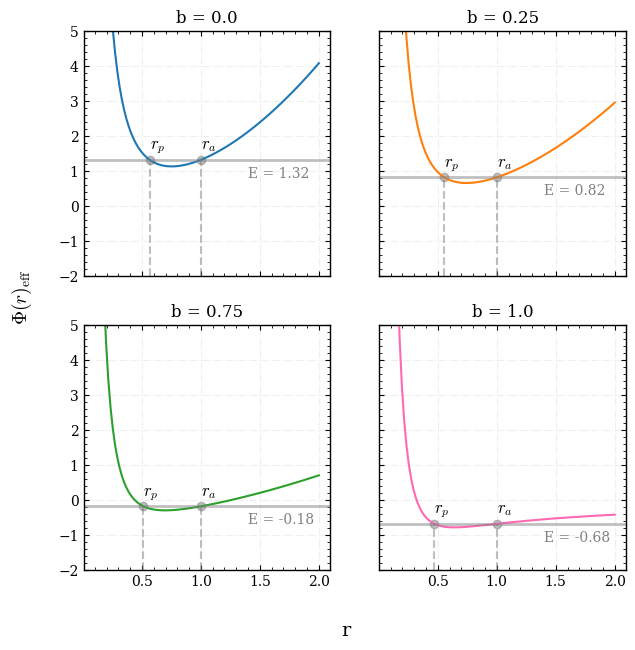

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
axes = axes.ravel()
r_array = np.linspace(0.1, 2, 100)

for i, (ax, b) in enumerate(zip(axes, array_b)):
    rp, ra = turning_points[b]
    Eb = energies[b]
    y = effective_potential(x_0, v_0, r_array, b)
    
    ax.plot(r_array, y, c=colors[i])

    ax.set_ylim(-2, 5)
    ax.scatter([ra, rp], [Eb, Eb], alpha=0.5, c='grey')
    ax.text(ra, Eb+0.3, r"$r_a$", fontsize=12)
    ax.text(rp, Eb+0.3, r"$r_p$", fontsize=12)
    ax.vlines([ra, rp], ymin=ax.get_ylim()[0], ymax=Eb, colors="grey", linestyles="--", alpha=0.5)
    ax.axhline(Eb, c='grey', lw=2, alpha=0.5)
    ax.text(1.4, Eb - 0.5, f"E = {Eb:.2f}", c='grey')

    ax.set_title(f"b = {b}")

fig.supxlabel('r', fontsize=14)
fig.supylabel(r'$\Phi(r)_\text{eff}$', fontsize=14);

# plt.tight_layout()

#### 3d.

Integrating the orbit of b for $\geq 5$ radial oscillations. We do this by using the Velocity Verlet algorithm. The first cell below I have the function to calculate the verlet step and some helpers for the acceleration updates.

In [20]:
# use units where GM = 1
GM = 1.0

r_0 = 1
pos_0 = np.array([r_0, 0])
vel_0 = np.array([0, 0.8])

def potential3(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -b/r + (1-b)*r**2

def _ax(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -(b/r**3+2*(1-b))*pos[0]

def _ay(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -(b/r**3+2*(1-b))*pos[1]


def verlet_step(pos, vel, b, dt):
    x, y   = pos[0], pos[1]
    vx, vy = vel[0], vel[1]
    ax = _ax(pos, b)
    ay = _ay(pos, b)

    # next position
    x_n1 = x + vx*dt + 0.5*ax*dt**2
    y_n1 = y + vy*dt + 0.5*ay*dt**2

    pos_n = np.array([x_n1, y_n1])

    # next acceleration
    ax_n1 = _ax(pos_n, b)
    ay_n1 = _ay(pos_n, b)

    # next velocity

    vx_n1 = vx+0.5*(ax+ax_n1)*dt
    vy_n1 = vy+0.5*(ay+ay_n1)*dt

    vel_n = np.array([vx_n1, vy_n1])

    return pos_n, ax_n1, ay_n1, vel_n


This next cell computes the orbit from the inital conditions to some t_final.

In [21]:
dt = 0.01
t_array = np.arange(0, 22, dt)

x_array = np.zeros_like(t_array)
y_array = np.zeros_like(t_array)

x_array[0] = pos_0[0]
y_array[0] = pos_0[1]

vx_array = np.zeros_like(t_array)
vy_array = np.zeros_like(t_array)

vx_array[0] = vel_0[0]
vy_array[0] = vel_0[1]


results = {}
for b in array_b:
    x_array  = np.zeros_like(t_array)
    y_array  = np.zeros_like(t_array)
    vx_array = np.zeros_like(t_array)
    vy_array = np.zeros_like(t_array)


    x_array[0], y_array[0]   = pos_0
    vx_array[0], vy_array[0] = vel_0

    for i in range(len(t_array) - 1):
        pos_n = np.array([x_array[i], y_array[i]])
        vel_n = np.array([vx_array[i], vy_array[i]])

        pos_n1, ax_n1, ay_n1, vel_n1 = verlet_step(pos_n, vel_n, b, dt)

        x_array[i+1], y_array[i+1]   = pos_n1
        vx_array[i+1], vy_array[i+1] = vel_n1

    results[float(b)] = {"t": t_array.copy(),"x": x_array.copy(),"y": y_array.copy(),"vx": vx_array.copy(),"vy": vy_array.copy()}

    


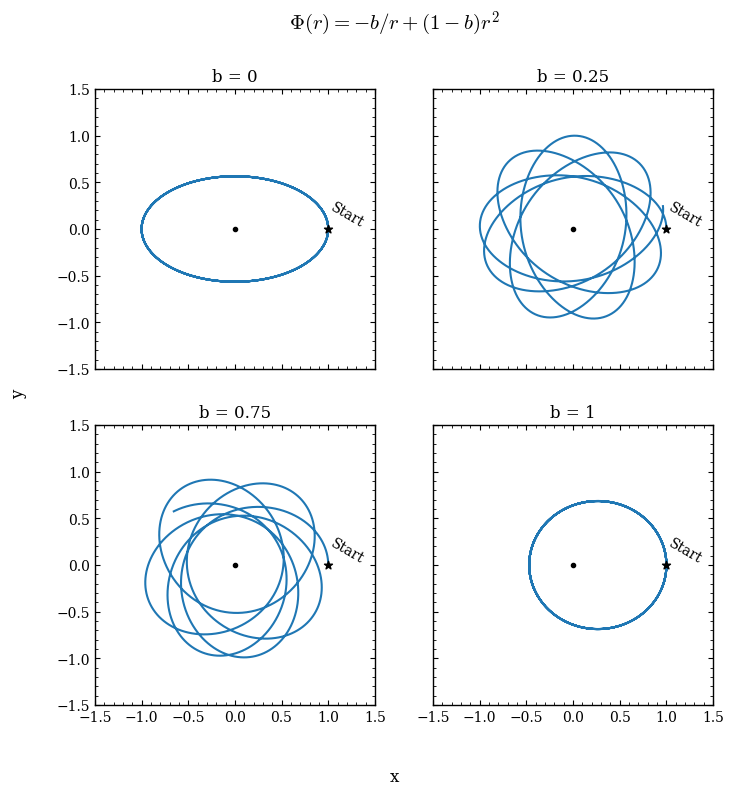

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.ravel()

fig.suptitle(r"$\Phi(r) = -b/r + (1-b)r^2$", fontsize=15)
fig.supylabel("y")
fig.supxlabel("x")

for ax, b in zip(axes, list(results.keys())[:4]):
    out = results[b]
    ax.plot(out["x"], out["y"])
    ax.scatter([out["x"][0]], [out["y"][0]], marker='*', c='k', zorder=5)
    ax.text(out["x"][0], out["y"][0], "Start", va="bottom", ha="left", rotation=-30)
    ax.scatter(0, 0, marker='.', c='k')
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(alpha=0)
    ax.set_title(f"b = {b:g}")




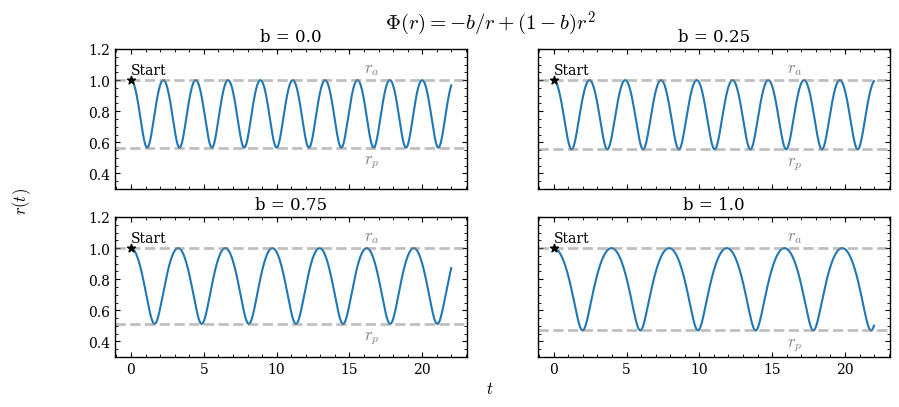

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True)
axes = axes.ravel()

fig.suptitle(r"$\Phi(r) = -b/r + (1-b)r^2$", fontsize=15)
fig.supylabel(r"$r(t)$")
fig.supxlabel(r"$t$")

for ax, b in zip(axes, list(results.keys())[:4]):
    xy_positions = results[b]
    r = np.sqrt(xy_positions['x']**2 + xy_positions['y']**2)
    ax.plot(t_array, r)
    ax.scatter(t_array[0], r[0], marker='*', c='k', zorder=5)
    ax.text(t_array[0], r[0]+0.02, "Start", va="bottom", ha="left")
    ax.set_title(f'b = {b}')
    ax.axhline(turning_points[b][0], c='grey', lw=2, alpha=0.5, ls='dashed')
    ax.text(16, turning_points[b][0]-0.1, r"$r_p$", fontsize=12, c='grey')
    ax.axhline(turning_points[b][1], c='grey', lw=2, alpha=0.5, ls='dashed')
    ax.text(16, turning_points[b][1]+0.05, r"$r_a$", fontsize=12, c='grey')
    ax.set_ylim(0.3, 1.2)
    ax.grid(alpha=0)



#### 3e

By inspection, one can tell that the b = 0 and b = 1 orbits are closed, and the other two are not (rosette pattern).

When b=0, the potential is:

$$
\Phi(r)_{b=0} = r^2,
$$

which is the harmonic oscillator. Alternatively, when b=1 the potential becomes:

$$
\Phi(r)_{b=1} = -1/r,
$$

which is the keplarian potential. This agrees with **Bertrand's Theorem**, which states that only the harmonic oscillator and keplarian potentials have all bound orbits closed.

### End of Assignment

### Appendix
##### Animation for d

Must run the following command in terminal in output directory:

```ffmpeg -framerate 20 -i orbit_%d.png -c:v libx264 -r 30 output.mp4```

In [24]:
# import os
# import shutil

# fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
# axes = axes.ravel()

# fig.suptitle(r"$\Phi(r) = -b/r + (1-b)r^2$", fontsize=15)
# fig.supylabel("y")
# fig.supxlabel("x")

# if os.path.exists("orbit_frames"):
#     shutil.rmtree("orbit_frames")
# os.makedirs("orbit_frames", exist_ok=True)

# for k, i in enumerate(range(0, len(t_array), 15)):

#     for ax, b in zip(axes, list(results.keys())[:4]):
#         out = results[b]
#         ax.plot(out["x"][:i], out["y"][:i])
#         ax.scatter([out["x"][0]], [out["y"][0]], marker='*', c='k', zorder=5)
#         ax.text(out["x"][0], out["y"][0], "Start", va="bottom", ha="left", rotation=-30)
#         ax.scatter(0, 0, marker='.', c='k')
#         ax.set_aspect('equal')
#         ax.set_xlim(-1.5, 1.5)
#         ax.set_ylim(-1.5, 1.5)
#         ax.grid(alpha=0)
#         ax.set_title(f"b = {b:g}")

#     plt.savefig(f"orbit_frames/orbit_{k}.png")
#     for ax in axes:
#         ax.clear()

# plt.close(fig) 